<a href="https://colab.research.google.com/github/Eriqr/sales-predictions/blob/main/sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

Mount Google Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load Data from drive & check information

In [5]:
sales_pred = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Codes/Track1_Project/sales_predictions.csv')
sales_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Data cleansing.

In [9]:
sales_pred.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# Fill empties with something ('No Size')
sales_pred['Outlet_Size'] = sales_pred['Outlet_Size'].fillna('No Size')
sales_pred.head()


In [14]:
# Interpolate in order to fill Item weights. 
sales_pred['Item_Weight'] = sales_pred['Item_Weight'].interpolate(method ='linear')
# Count items weight, check if there's empties. 
sales_pred.groupby([sales_pred['Item_Weight'].isna(),'Item_Identifier'])['Item_Identifier'].count()



Item_Weight  Item_Identifier
False        DRA12              6
             DRA24              7
             DRA59              8
             DRB01              3
             DRB13              5
                               ..
             NCZ30              7
             NCZ41              5
             NCZ42              5
             NCZ53              5
             NCZ54              7
Name: Item_Identifier, Length: 1559, dtype: int64

In [15]:
# Final check.
sales_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### **2nd Part: DataViz**


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

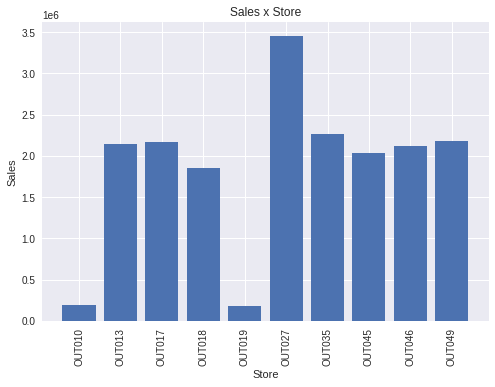

In [14]:
# Total sales by store.
plt.style.use('seaborn')
plt.bar(sales_pred.groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].sum().index, sales_pred.groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].sum().values)
plt.title('Sales x Store',fontsize=12)
plt.xlabel('Store',fontsize=11)
plt.ylabel('Sales',fontsize=11)
plt.xticks(rotation =90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text major ticklabel objects>)

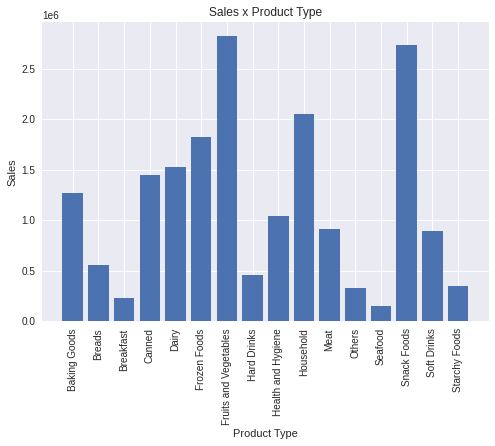

In [13]:
# Total sales by product type.
plt.style.use('seaborn')
plt.bar(sales_pred.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().index,sales_pred.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().values)
plt.title('Sales x Product Type',fontsize=12)
plt.xlabel('Product Type',fontsize=11)
plt.ylabel('Sales',fontsize=11)
plt.xticks(rotation =90)

### **3rd Part: Analysis**


Text(0.5, 0, 'Product Sales')

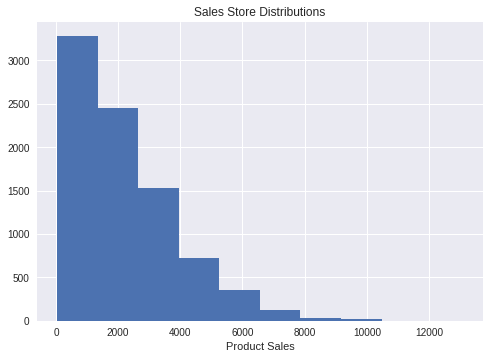

In [17]:
# Sales distribution in stores.
sales_pred['Item_Outlet_Sales'].hist()
plt.style.use('seaborn')
plt.title('Sales Store Distributions', fontsize=12)
plt.xlabel('Product Sales',fontsize=11)
# Rigth Bias.